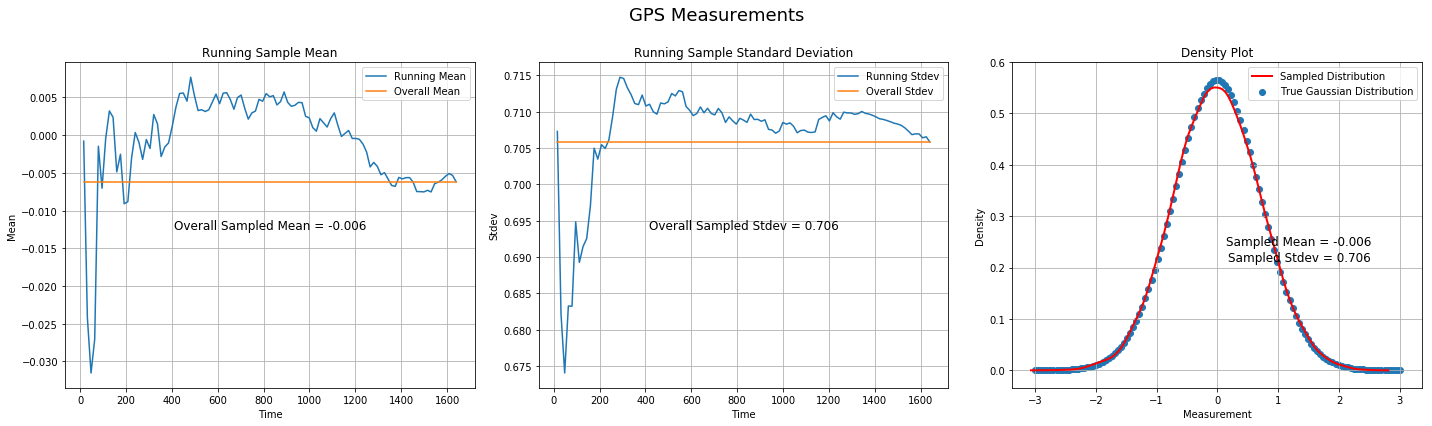

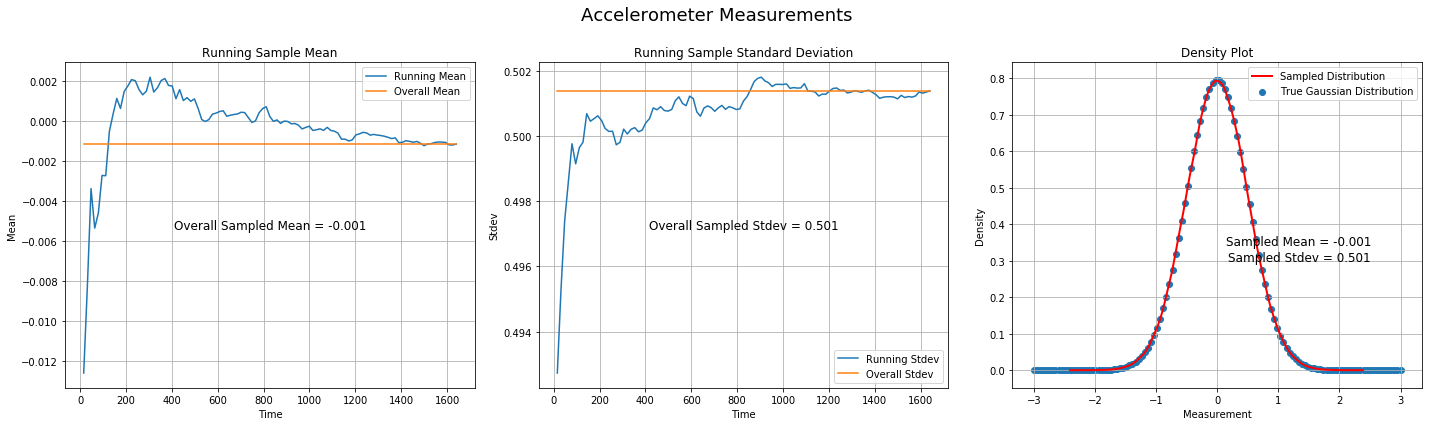

done


In [172]:
import seaborn as sns
import csv
import numpy as np
import math
import statistics 
import matplotlib.pyplot as plt

%matplotlib inline

def gaussian(x, mu, sig):
    y = 1./(math.sqrt(2.*math.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
    return x, y

def get_measurements(file):

    dir = 'E:/FCND/Project4/FCND-Estimation-CPP/config/log/'
    reader = csv.reader(open(dir+file, newline=''))
    header = next(reader)

    time=[]
    measurements=[]

    for row in reader:
        time.append(float(row[0]))
        measurements.append(float(row[1]))

    return time, measurements

def running_stats(time_data, n):
    samples=[]
    t=[]
    mean=[]
    stdev=[]
    
    for i, measurement in enumerate(time_data):
        samples.append(measurement[1])
        
        if (i+1) % n == 0:
            t.append(measurement[0])
            m = statistics.mean(samples)
            s = statistics.stdev(samples, xbar = m)
            mean.append(m)
            stdev.append(s)
    return t, mean, stdev

def plot_stats(t, mean, stdev, density, title):
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
    f.suptitle(title, fontsize=18)
    
    ax1.set(xlabel='Time', ylabel='Mean', title='Running Sample Mean')
    ax1.plot(t, mean, label='Running Mean')
    ax1.plot(t, len(t)*[mean[-1]], label='Overall Mean')
    ax1.text(0.5, 0.5, 'Overall Sampled Mean = '+str(round(mean[-1],3)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=12)
    ax1.grid()
    ax1.legend()

    ax2.set(xlabel='Time', ylabel='Stdev', title='Running Sample Standard Deviation')
    ax2.plot(t, stdev, label='Running Stdev')
    ax2.plot(t, len(t)*[stdev[-1]], label='Overall Stdev')
    ax2.text(0.5, 0.5, 'Overall Sampled Stdev = '+str(round(stdev[-1],3)), horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, fontsize=12)
    ax2.grid()
    ax2.legend()

    ax3.set(xlabel='Measurement', ylabel='Density', title='Density Plot')
    sns.distplot(measurements, hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}, ax=ax3, label='Sampled Distribution')
    
    x, y = gaussian(np.linspace(-3, 3, 120), mean[-1], stdev[-1])
    ax3.scatter(x, y, label='True Gaussian Distribution')
    
    ax3.text(0.7, 0.45, 'Sampled Mean = '+str(round(mean[-1],3)), horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes, fontsize=12)
    ax3.text(0.7, 0.4, 'Sampled Stdev = '+str(round(stdev[-1],3)), horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes, fontsize=12)
    ax3.grid()
    ax3.legend()
    
    plt.tight_layout()
    f.subplots_adjust(top=0.85)
    plt.savefig('E:/FCND/Project4/' + title + '.png')
    plt.show()
    
    return None

time, measurements = get_measurements('graph1(used).txt')
t, mean, stdev = running_stats(zip(time, measurements), 160)
plot_stats(t, mean, stdev, measurements, 'GPS Measurements')

time, measurements = get_measurements('graph2(used).txt')
t, mean, stdev = running_stats(zip(time, measurements), 3200)
plot_stats(t, mean, stdev, measurements, 'Accelerometer Measurements')
print ('done')

